# Tourist Attractions in India

In [ ]:
# Written by Jaya Vazirani and ChatGPT

## 1. Import Libraries

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Exploration

In [147]:
df = pd.read_csv("visit.csv")

In [148]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        325 non-null    int64  
 1   Zone                              325 non-null    object 
 2   State                             325 non-null    object 
 3   City                              325 non-null    object 
 4   Name                              325 non-null    object 
 5   Type                              325 non-null    object 
 6   Establishment Year                325 non-null    object 
 7   time needed to visit in hrs       325 non-null    float64
 8   Google review rating              325 non-null    float64
 9   Entrance Fee in INR               325 non-null    int64  
 10  Airport with 50km Radius          325 non-null    object 
 11  Weekly Off                        32 non-null     object 
 12  Signific

Index(['Unnamed: 0', 'Zone', 'State', 'City', 'Name', 'Type',
       'Establishment Year', 'time needed to visit in hrs',
       'Google review rating', 'Entrance Fee in INR',
       'Airport with 50km Radius', 'Weekly Off', 'Significance',
       'DSLR Allowed', 'Number of google review in lakhs',
       'Best Time to visit'],
      dtype='object')

In [149]:
df.head(10)

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning
5,5,Northern,Delhi,Delhi,Chandni Chowk,Market,1700,3.0,4.2,0,Yes,Sunday,Market,Yes,0.25,Afternoon
6,6,Northern,Delhi,Delhi,Lotus Temple,Temple,1986,1.0,4.5,0,Yes,Monday,Religious,Yes,0.59,Evening
7,7,Northern,Delhi,Delhi,Red Fort,Fort,1648,2.0,4.5,35,Yes,NaN,Historical,Yes,1.50,Afternoon
8,8,Northern,Delhi,Delhi,Agrasen ki Baoli,Stepwell,1400,1.0,4.2,0,Yes,NaN,Historical,Yes,0.41,Afternoon
9,9,Northern,Delhi,Delhi,Sunder Nursery,Park,1600,2.0,4.6,0,Yes,NaN,Botanical,Yes,0.16,Afternoon


## 3. Data Cleaning

In [150]:
df.columns

Index(['Unnamed: 0', 'Zone', 'State', 'City', 'Name', 'Type',
       'Establishment Year', 'time needed to visit in hrs',
       'Google review rating', 'Entrance Fee in INR',
       'Airport with 50km Radius', 'Weekly Off', 'Significance',
       'DSLR Allowed', 'Number of google review in lakhs',
       'Best Time to visit'],
      dtype='object')

### Check for Null values

In [151]:
df.isna().sum() / df.shape[0]

Unnamed: 0                          0.000000
Zone                                0.000000
State                               0.000000
City                                0.000000
Name                                0.000000
Type                                0.000000
Establishment Year                  0.000000
time needed to visit in hrs         0.000000
Google review rating                0.000000
Entrance Fee in INR                 0.000000
Airport with 50km Radius            0.000000
Weekly Off                          0.901538
Significance                        0.000000
DSLR Allowed                        0.000000
Number of google review in lakhs    0.000000
Best Time to visit                  0.000000
dtype: float64

### Check for duplicates

In [152]:
df.duplicated().sum()

0

### Drop unecessary columns 

In [153]:
# Only keep columns we want
df = df [['Zone', 'State', 'Name',
       'Establishment Year', 'time needed to visit in hrs',
       'Google review rating', 'Entrance Fee in INR',
       'Airport with 50km Radius', 'Significance',
       'DSLR Allowed',
       'Best Time to visit']]

df.shape

(325, 11)

In [154]:
# Rename our columns for consistency
df = df.rename(columns={'Establishment Year':'Establishment_Year',
                   'time needed to visit in hrs':'Time_Needed',
                   'Google review rating': 'Rating',
                   'Entrance Fee in INR':'Entrance_Fee',
                   'Airport with 50km Radius':'Airport_Nearby',
                   'DSLR Allowed':'Camera',
                   'Best Time to visit':'Best_Time'})

### String formatting and categorization 

In [155]:
df["Establishment_Year"].value_counts()
# map first two characters to 1900 1800 etc

Establishment_Year
Unknown         111
1950              5
1600              4
2013              4
12th century      4
               ... 
1799              1
2002              1
1451              1
2018              1
1727              1
Name: count, Length: 162, dtype: int64

In [156]:
df["Zone"].value_counts()

Zone
Southern         98
Northern         89
Eastern          45
Western          40
Central          39
North Eastern    14
Name: count, dtype: int64

In [157]:
df["Significance"].value_counts()

Significance
Historical            78
Religious             75
Nature                47
Recreational          30
Wildlife              29
Cultural              13
Scenic                10
Shopping               7
Entertainment          5
Adventure              5
Architectural          4
Botanical              3
Environmental          2
Natural Wonder         2
Artistic               2
Educational            2
Sports                 2
Scientific             2
Spiritual              1
Archaeological         1
Agricultural           1
Engineering Marvel     1
Market                 1
Trekking               1
Food                   1
Name: count, dtype: int64

In [158]:
significance_dt = {"Other": ["Shopping", "Entertainment", "Artistic", "Educational", "Scientific", "Agricultural",
                       "Engineering Marvel", "Market", "Food"],
             "Historical": ["Historical", "Architectural", "Archaeological"],
             "Religious": ["Religious", "Spiritual", "Cultural"],
             "Nature": ["Nature", "Wildlife", "Scenic", "Environmental", "Natural Wonder", "Botanical"],
             "Recreational": ["Recreational", "Trekking", "Sports", "Adventure"]}

def organize_significance(word):
    for key in significance_dt:
        if word in significance_dt[key]:
            return key
    return word

df["Significance"] = df["Significance"].map(organize_significance)
df["Significance"].value_counts()

Significance
Nature          93
Religious       89
Historical      83
Recreational    38
Other           22
Name: count, dtype: int64

In [159]:
df["Airport_Nearby"].value_counts()

Airport_Nearby
Yes    227
No      98
Name: count, dtype: int64

#### Best Time categorization 

In [160]:
df["Best_Time"].value_counts()

Best_Time
All          164
Morning       88
Afternoon     44
Evening       26
All            1
Anytime        1
Night          1
Name: count, dtype: int64

In [161]:
# Possible times: all, morning, afternoon, evening 
status_dt = {"All": ["All", "Anytime", "All"],
             "Evening": ["Night", "Evening"]}

def organize_status(word):
    for key in status_dt:
        if word in status_dt[key]:
            return key
    return word.strip()

df["Best_Time"] = df["Best_Time"].map(organize_status)
df["Best_Time"].value_counts()

Best_Time
All          166
Morning       88
Afternoon     44
Evening       27
Name: count, dtype: int64

## 4. Univariate 

### Numerical Data

In [163]:
# When performing EDA on individual columns of data, thinking through the following acronym
#can give you a better understanding of the data (CSOCS):
#● Context - what data are we looking at
#● Shape - how is your data distributed (boxplots, histograms)
#● Outliers
#● Center - mean, median, mode?
#● Spread - Range, IQR, Standard Deviation

# Rating
average = df["Rating"].mean()
mode = df["Rating"].max() - df["Rating"].min()

3.5000000000000004

{'whiskers': [<matplotlib.lines.Line2D at 0x16754ea30>,
 'caps': [<matplotlib.lines.Line2D at 0x167615d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x167545760>],
 'medians': [<matplotlib.lines.Line2D at 0x167330460>],
 'fliers': [<matplotlib.lines.Line2D at 0x167330070>],
 'means': []}

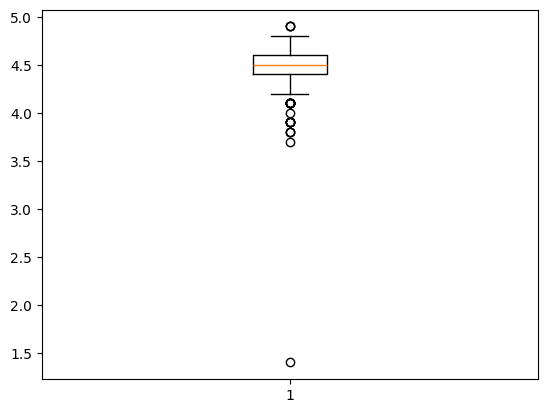

In [164]:
plt.boxplot(df["Rating"])

<Axes: xlabel='Time_Needed'>

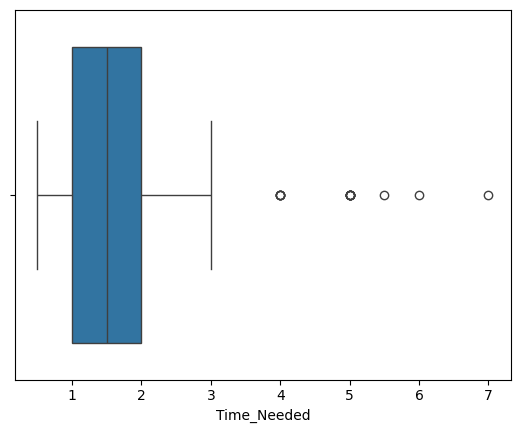

In [113]:
# numerical data: time needed to visit in hours
sns.boxplot(data=df, x="Time_Needed")

<Axes: xlabel='Entrance_Fee'>

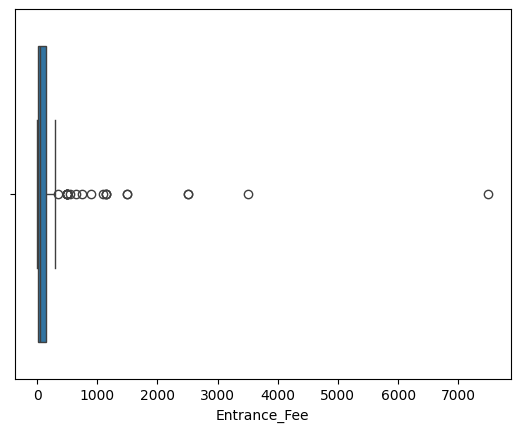

In [79]:
# Only plot where entrance fee isn't 0
df2 = df[df["Entrance_Fee"] != 0]
sns.boxplot(data=df2, x="Entrance_Fee")

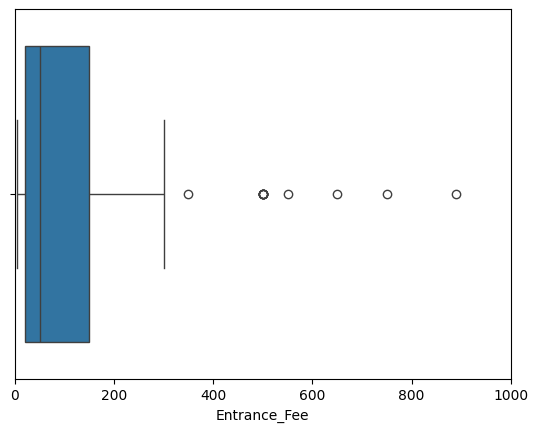

In [166]:
# More zoomed in
sns.boxplot(data=df2, x="Entrance_Fee")
# chat GPT wrote this line
plt.xlim(0, 1000)  # Set the limits according to your preference
plt.show()

### Categorical Data

<Axes: xlabel='Significance', ylabel='Count'>

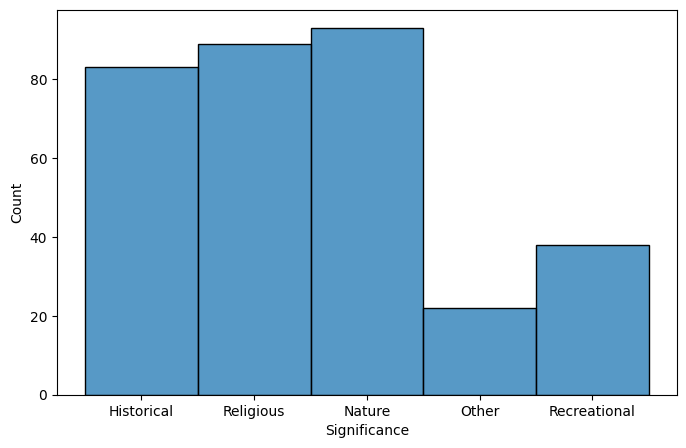

In [167]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Significance") 

<Axes: xlabel='Best_Time', ylabel='Count'>

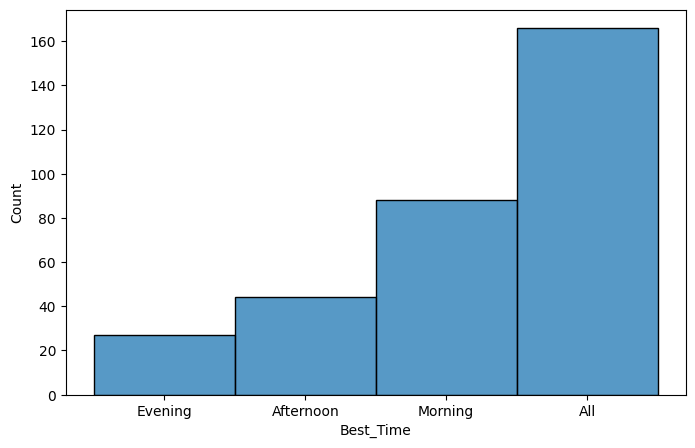

In [115]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Best_Time") 

<Axes: xlabel='Airport_Nearby', ylabel='Count'>

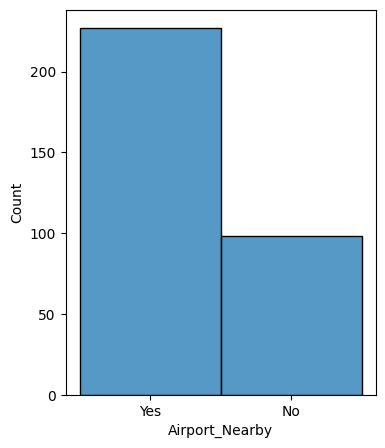

In [26]:
plt.figure(figsize=(4,5))
sns.histplot(data=df, x="Airport_Nearby") 

<Axes: xlabel='Camera', ylabel='Count'>

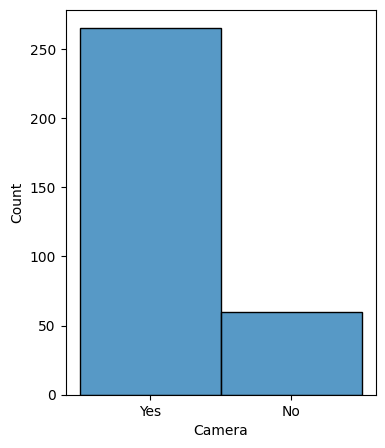

In [27]:
plt.figure(figsize=(4,5))
sns.histplot(data=df, x="Camera") 

# 5. Multivariate

<Axes: title={'center': 'Entrance fee vs. rating'}, xlabel='Entrance_Fee', ylabel='Rating'>

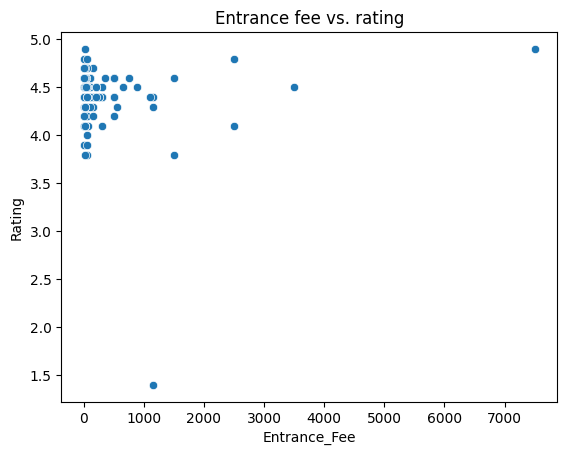

In [176]:
plt.title("Entrance fee vs. rating")

sns.scatterplot(data=df2, x="Entrance_Fee", y="Rating")

<Axes: title={'center': 'Time fee vs. rating'}, xlabel='Time_Needed', ylabel='Rating'>

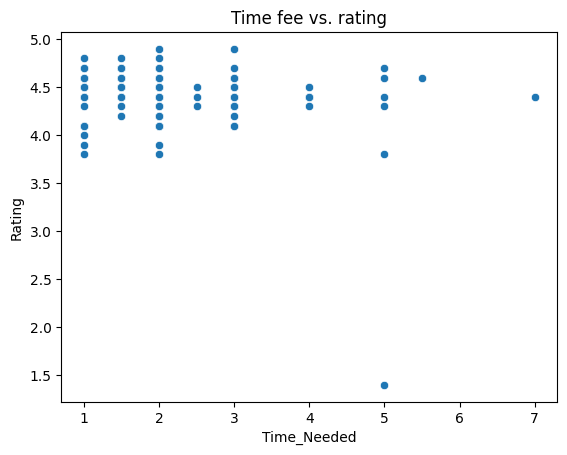

In [177]:
plt.title("Time fee vs. rating")

sns.scatterplot(data=df2, x="Time_Needed", y="Rating")

<Axes: title={'center': 'Time needed vs. best time'}, xlabel='Best_Time', ylabel='Time_Needed'>

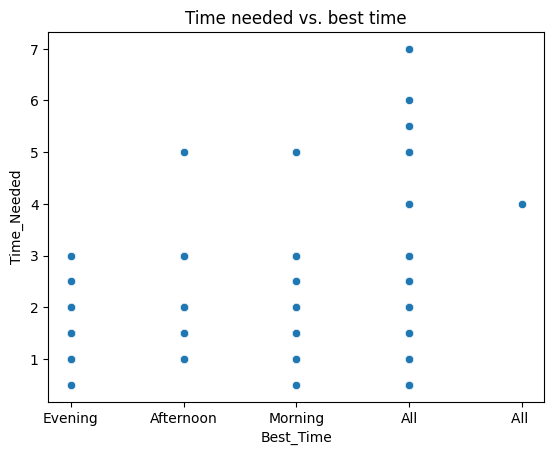

In [29]:
# Want to do best time to visit and time needed to visit
plt.title("Time needed vs. best time")

sns.scatterplot(data=df, x="Best_Time", y="Time_Needed")

## 6. Statistical Analysis

In [ ]:
# Questions
# 1) which state has the best rating to time needed ratio (basically looking at time value)
# 2) What is the average rating for different kinds of attractions
# 3) Which zone has the most historical attractions

### Question 1: Which state has the best rating to time needed ratio? 

In [169]:
# Make new column called time value
df["Time_Value"] =  df['Rating'] / df['Time_Needed']
df.head()

,Zone,State,Name,Establishment_Year,Time_Needed,Rating,Entrance_Fee,Airport_Nearby,Significance,Camera,Best_Time,Time_Value
0,Northern,Delhi,India Gate,1921,0.5,4.6,0,Yes,Historical,Yes,Evening,9.20
1,Northern,Delhi,Humayun's Tomb,1572,2.0,4.5,30,Yes,Historical,Yes,Afternoon,2.25
2,Northern,Delhi,Akshardham Temple,2005,5.0,4.6,60,Yes,Religious,No,Afternoon,0.92
3,Northern,Delhi,Waste to Wonder Park,2019,2.0,4.1,50,Yes,Nature,Yes,Evening,2.05
4,Northern,Delhi,Jantar Mantar,1724,2.0,4.2,15,Yes,Other,Yes,Morning,2.10


In [124]:
# Rank states in order of their time value
df.groupby("State")[["Time_Value"]].mean().sort_values(by="Time_Value", ascending=False)

,Time_Value
State,
Jharkhand,4.650000
Andaman and Nicobar Islands,3.841667
Ladakh,3.826667
Daman and Diu,3.783333
West Bengal,3.780833
Puducherry,3.683333
Tamil Nadu,3.676923
Andhra Pradesh,3.661111
Sikkim,3.635714


#### Conclusion: Jharkhand has the best time value for visiting 

### Question 2: Which zone are the most historical sites located? 

In [170]:
historical_sites = df[df['Significance'] == 'Historical']

# Count the occurrences of historical sites by zone
# This line was writted by ChatGPT
historical_per_zone = historical_sites['Zone'].value_counts()

# This line was written by ChatGPT
max_zone = historical_per_zone.idxmax()
max_sites = historical_per_zone.max()

print(f"The zone with the most historical sites is {max_zone} with {max_sites} historical sites.")

The zone with the most historical sites is Southern with 24 historical sites.


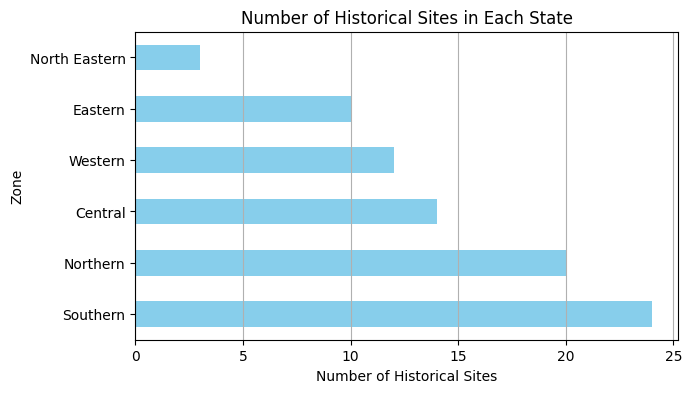

In [171]:
historical_zone = historical_sites['Zone'].value_counts()

# Written by ChatGPT
# Plot the horizontal bar plot
plt.figure(figsize=(7, 4))
historical_zone.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Historical Sites')
plt.ylabel('Zone')
plt.title('Number of Historical Sites in Each State')
plt.grid(axis='x')
plt.show()

#### Conclusion: The southern zone has the most historical sits with 24 sites

### Question Three: What is the average rating for different kinds of attractions? 

In [172]:
df.groupby("Significance")[["Rating"]].mean().sort_values(by="Rating", ascending=False)

,Rating
Significance,
Religious,4.649438
Historical,4.507229
Other,4.468182
Nature,4.409677
Recreational,4.255263


In [173]:
# Make a new column called average rating and assign to all with that significance
df['Avg_Rating'] = df.groupby('Significance')['Rating'].transform('mean')
df.head(10)


,Zone,State,Name,Establishment_Year,Time_Needed,Rating,Entrance_Fee,Airport_Nearby,Significance,Camera,Best_Time,Time_Value,Avg_Rating
0,Northern,Delhi,India Gate,1921,0.5,4.6,0,Yes,Historical,Yes,Evening,9.20,4.507229
1,Northern,Delhi,Humayun's Tomb,1572,2.0,4.5,30,Yes,Historical,Yes,Afternoon,2.25,4.507229
2,Northern,Delhi,Akshardham Temple,2005,5.0,4.6,60,Yes,Religious,No,Afternoon,0.92,4.649438
3,Northern,Delhi,Waste to Wonder Park,2019,2.0,4.1,50,Yes,Nature,Yes,Evening,2.05,4.409677
4,Northern,Delhi,Jantar Mantar,1724,2.0,4.2,15,Yes,Other,Yes,Morning,2.10,4.468182
5,Northern,Delhi,Chandni Chowk,1700,3.0,4.2,0,Yes,Other,Yes,Afternoon,1.40,4.468182
6,Northern,Delhi,Lotus Temple,1986,1.0,4.5,0,Yes,Religious,Yes,Evening,4.50,4.649438
7,Northern,Delhi,Red Fort,1648,2.0,4.5,35,Yes,Historical,Yes,Afternoon,2.25,4.507229
8,Northern,Delhi,Agrasen ki Baoli,1400,1.0,4.2,0,Yes,Historical,Yes,Afternoon,4.20,4.507229
9,Northern,Delhi,Sunder Nursery,1600,2.0,4.6,0,Yes,Nature,Yes,Afternoon,2.30,4.409677


<Axes: title={'center': 'Significance vs. Rating'}, xlabel='Significance', ylabel='Avg_Rating'>

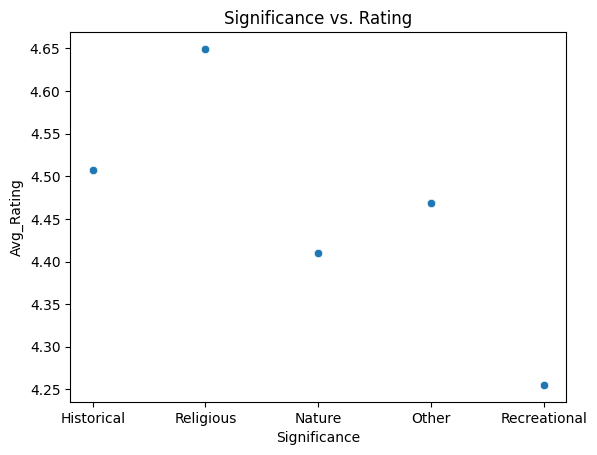

In [138]:
plt.title("Significance vs. Rating")
sns.scatterplot(data=df, x="Significance", y="Avg_Rating")

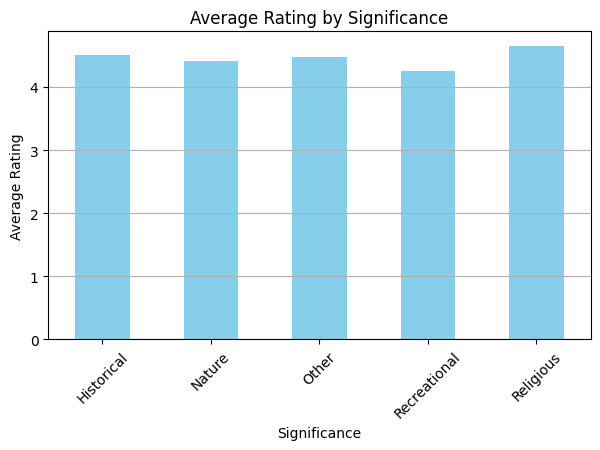

In [175]:
# Written by ChatGPT
significance_avg_rating = df.groupby('Significance')['Avg_Rating'].mean()

# Plot the bar graph
plt.figure(figsize=(7, 4))
significance_avg_rating.plot(kind='bar', color='skyblue')
plt.xlabel('Significance')
plt.ylabel('Average Rating')
plt.title('Average Rating by Significance')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  
plt.grid(axis='y')
plt.show()

#### Conclusion: Religious sites had the highest average rating with an average rating of around 4.65, closely followed by historical sites, with an average rating of 4.5

## 8. Future steps with the dataset

### What further uses could you see with this data? 
#### This data could be helpful for planning a vacation. It could use special interests (ie food or historical) to pick attractions that are suitable. Additionally, traveling to a foreign country can be quite difficult when you are not accustomed to their norms so it is helpful to know things like can you bring a camera or is it close to an airport

### Would it be worth training a machine learning model on it? 

#### Yes, I think it could be worth training a machine learning model on this data. Some ways it could be helpful are: 
#### 1. Recommendations for visitors: if a visitor states their preferences (cost, state) then certain attractions could be recommended
#### 2. It could make predictions about the future of tourism by analyzing certain aspects of a site and the rating left on the site. It could determine what kind of attractions would be popular in the future